# Business Understanding

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Data Understanding

The data for the solving the business problem comes from the following sources: Box Office Mojo (https://www.boxofficemojo.com/), IMDB (https://www.imdb.com/), Rotten Tomatos (https://www.rottentomatoes.com/), The Movie Database (https://www.themoviedb.org/?language=en-US), and The Numbers (https://www.the-numbers.com/).

Before solving for the business problem, I want to examine data from the aforementioned sources.  When I conduct exploratory data analysis of data, I aim to understand the following attributes:

1. Number of columns
2. Number of rows
3. Columns Names

In [1]:
# Importing libraries

import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle

## IMDB | Data Understanding

The dataset for IMDB is contained within a zip file.  Before conducting exploratory data analysis, I will need to unzip the file.  Subsequently, I will utilize the following method - 'pd.read_sql' - to open any files and undestand the associated tables.

In [2]:
# # Opening the "im.db.zip" file and understand the name(s) of the files within the "im.db.zip" file

# import zipfile

# with zipfile.ZipFile('im.db.zip', 'r') as zip_ref:
#     zip_ref.extractall('movie_analysis_phase_2') 
#     file_list = zip_ref.namelist()

# print(file_list)

In [3]:
! ls

README.md
data
notebook.ipynb


In [4]:
# Checking to ensure that the path for the "im.db.zip" file is correct

import os

print(os.path.exists('data/im.db'))

True


In [5]:
# Establishing the database connection path for the "im.db.zip" file

conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [6]:
# Executing the query to examine all of the tables in the "im.db" file

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [7]:
# Examining the contents of the "movie_basics" table

query_movie_basics = """SELECT * 
        FROM movie_basics;"""
        
pd.read_sql(query_movie_basics, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
# Examining the contents of the "principals" table

query_principals = """SELECT * 
        FROM principals;"""
        
pd.read_sql(query_principals, conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [9]:
# Examining the contents of the "persons" table

query_persons = """SELECT * 
        FROM persons;"""
        
pd.read_sql(query_persons, conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [10]:
# Placing the "movie_basics" table in a dataframe

query_movie_basics = """SELECT * 
        FROM movie_basics;"""
        
df_imdb_movie_basics = pd.read_sql(query_movie_basics, conn)

In [11]:
# Closing the connection to the file since I have already made the desired dataframes

conn.close()

In [12]:
# Examining the top 5 rows of the "df_imdb_movie_basics" dataframe

df_imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
# Examining the bottom 5 rows of the "df_imdb_movie_basics" dataframe

df_imdb_movie_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [14]:
# Utilizing the ".info()" method to further understand the "df_imdb_movie_basics" dataframe

df_imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [15]:
# Examining the shape of the "df_imdb_movie_basics" dataframe

df_imdb_movie_basics.shape

(146144, 6)

In [16]:
# Determining whether or not there are any duplicate rows in the "df_imdb_movie_basics" dataframe

imdb_movie_basics_duplicates = df_imdb_movie_basics[df_imdb_movie_basics.duplicated()]
print(len(imdb_movie_basics_duplicates))

0


In [17]:
# Determining whether or not there are any rows with null values within the "df_imdb_movie_basics" dataframe

df_imdb_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

### IMDB | Data Understanding (Conclusion)

I have completed the exploratory data analysis of the IMDB zip file. Within the zip file, there was only one file, which was titled "im.db". Upon unzipping the file, I utilized the following code - 'cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")' - to understand the various tables.

The tables within the im.db file are the following: *movie_basics*, *directors*, *known_for*, *movie_akas*, *movie_ratings*, *persons*, *principals*, *writers*. This is congruent with the entity relationship diagram (ERD). Upon ascertaining the various tables, I explored the different columns within each table.

I decided to place the *movie_basics* table into a dataframe, which is titled *df_imdb_movie_basics*. The tables has a total of 146,144 rows and 6 columns. The movie_basics table has a column - *runtime_minutes* - that I am interested in using for analytics. However, there are 31,739 cells within the runtime_minutes column that has null values. I may have to delete the rows to further my eventual analysis.

## Box Office Mojo | Data Understanding

The dataset for Box Office Mojo is contained within a csv file.  I will utilize the following method - 'pd.read_csv()' - to examine the contents of the csv file.

In [18]:
# Reading the contents of the Box Office Mojo csv to look at the columns and content

pd.read_csv('data/bom.movie_gross.csv.gz')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
# Placing the Box Office Mojo file into a Dataframe

df_bom = pd.read_csv('data/bom.movie_gross.csv.gz')

In [20]:
# Examining the first five rows of the Box Office Mojo dataframe

df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
# Examining the last five rows of the Box Office Mojo dataframe

df_bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [22]:
# Utilizing the ".info()" method to further understand the Box Office Mojo dataframe

df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
# Examining the shape of the Box Office Mojo dataframe

df_bom.shape

(3387, 5)

In [24]:
# Determining whether or not there are any duplicate rows in the Box Office Mojo dataframe

bom_duplicates = df_bom[df_bom.duplicated()]
print(len(bom_duplicates))

0


In [25]:
# Determining whether or not there are any rows with null values in the Box Office Mojo dataframe

df_bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Box Office Mojo | Data Understanding (Conclusion)

I have completed the exploratory data analysis of the csv file associated with Box Office Mojo.  I placed the contents of the csv file into a dataframe titled *df_bom*.  *Df_bom* has the following five columns - *title*, *studio*, *domestic_gross*, *foreign_gross*, and *year*.  *Df_bom* has a total of 3,387 rows. 

## Rotten Tomatoes (Movie Information) | Data Understanding

One of the datasets for Rotten Tomatoes is contained within a tsv file.  The data within the tsv file provides movie information.  I will utilize the following method - 'pd.read_csv()' - to examine the contents of the tsv file. 

In [26]:
# Placing the Rotten Tomatos (Movie Information) file into a Dataframe

df_rotten_movie = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')

In [27]:
# Examining the first five rows of the Rotten Tomatos (Movie Information) dataframe

df_rotten_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [28]:
# Examining the last five rows of the Rotten Tomatos (Movie Information) dataframe

df_rotten_movie.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [29]:
# Utilizing the ".info()" method to further understand the "df_rotten_movie" dataframe

df_rotten_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [30]:
# Utilizing the ".nunique()" method to further understand the number of unique values for the 'studio' column 

df_rotten_movie['studio'].nunique()

200

In [31]:
# Utilizing the ".unique()" method to understand the various studios populated in the 'studio' column

df_rotten_movie['studio'].unique()[0:20]

array([nan, 'Entertainment One', 'Warner Bros. Pictures',
       'Paramount Pictures', 'Sony Pictures Classics',
       'Showtime Documentary Films', 'Seventh Art Releasing',
       'ATO Pictures', 'Sony Pictures', 'Universal Pictures', 'MGM',
       'After Dark Films/Freestyle Releasing', 'Lions Gate Films',
       'Regent Releasing', 'Janus Films', 'The Weinstein Company',
       'New Line Cinema', 'Walt Disney Pictures', 'FilmDistrict',
       '20th Century Fox'], dtype=object)

In [32]:
# Utilizing the ".value_counts" method to understand which studios are the most populous in the "df_rotten_movie" dataframe

df_rotten_movie['studio'].value_counts()[0:20]

Universal Pictures          35
Paramount Pictures          27
20th Century Fox            26
Sony Pictures Classics      22
Warner Bros. Pictures       21
Sony Pictures               16
New Line Cinema             10
Columbia Pictures           10
IFC Films                    9
Miramax Films                8
Warner Bros.                 8
Fox Searchlight Pictures     7
Magnolia Pictures            7
MGM                          7
Lions Gate Films             6
The Weinstein Company        6
Walt Disney Pictures         6
Roadside Attractions         6
Focus Features               6
Lionsgate Films              6
Name: studio, dtype: int64

In [33]:
# Utilizing the ".nunique()" method to further understand the number of unique values for the 'writer' column

df_rotten_movie['writer'].nunique()

1069

In [34]:
# Utilizing the ".unique()" method to understand the various writers populated in the 'writer' column

df_rotten_movie['writer'].unique()

array(['Ernest Tidyman', 'David Cronenberg|Don DeLillo', 'Allison Anders',
       ..., 'Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner',
       'David Mickey Evans|Robert Gunter', 'Luc Besson'], dtype=object)

In [35]:
# Utilizing the ".value_counts" method to understand which writers are the most populous in the 'writer' column

df_rotten_movie['writer'].value_counts()

Woody Allen                           4
Sylvester Stallone                    3
Hong Sang-soo                         3
John Hughes                           3
Jim Jarmusch                          3
                                     ..
Simon Beaufoy|Simon Beaufor           1
Jimmy Sangster                        1
Tonino Guerra|Edmonde Charles-Roux    1
Rick Rubin|Ric Menello                1
Tom Stoppard|Menno Meyjes             1
Name: writer, Length: 1069, dtype: int64

In [36]:
# Examining the shape of the "df_rotten_movie" dataframe

df_rotten_movie.shape

(1560, 12)

In [37]:
# Determining whether or not there are any duplicate rows in the "df_rotten_movie" dataframe

rotten_movie_duplicates = df_rotten_movie[df_rotten_movie.duplicated()]
print(len(rotten_movie_duplicates))

0


In [38]:
# Determining whether or not there are any rows with null values in the "df_rotten_movie" dataframe

df_rotten_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

### Rotten Tomatoes (Movie Information) | Data Understanding (Conclusion)

I have completed the exploratory data analysis of the tsv file associated with the Rotten Tomatoes dataset.  I placed the contents of the tsv file into a dataframe titled *df_rotten_movie*.  *Df_rotten_movie* has the following 12 columns - *id*, *synopsis*, *rating*, *genre*, *director*, *writer*, *theater_date*, *dvd_date*, *currency*, *box_office*, *runtime*, and *studio*.  *Df_rotten_movie* has a total of 1,560 rows.

## Rotten Tomatoes (Reviews) | Data Understanding

The second dataset for Rotten Tomatoes is also contained within a tsv file.  The data within the tsv file provides movie critic information.  I will utilize the following method - 'pd.read_csv()' - to examine the contents of the tsv file.

In [39]:
# Placing the Rotten Tomatos (Reviews) file into a Dataframe

df_rotten_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='cp1252')

In [40]:
# Examining the first five rows of the Rotten Tomatos (Reviews) dataframe

df_rotten_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [41]:
# Examining the last five rows of the Rotten Tomatos (Reviews) dataframe

df_rotten_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [42]:
# Utilizing the ".info()" method to further understand the "df_rotten_reviews" dataframe

df_rotten_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [43]:
# Examining the shape of the "df_rotten_reviews" dataframe

df_rotten_reviews.shape

(54432, 8)

In [44]:
# Determining whether or not there are any duplicate rows in the "df_rotten_reviews" dataframe

df_rotten_reviews_duplicates = df_rotten_reviews[df_rotten_reviews.duplicated()]
print(len(df_rotten_reviews_duplicates))

9


In [45]:
# Determining whether or not there are any rows with null values in the "df_rotten_reviews" dataframe

df_rotten_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

### Rotten Tomatoes (Reviews) | Data Understanding (Conclusion)

I have completed the exploratory data analysis of the tsv file associated with the second Rotten Tomatoes dataset.  I placed the contents of the tsv file into a dataframe titled *df_rotten_reviews*.  *Df_rotten_reviews* has the following 8 columns - *id*, *review*, *rating*, *fresh*, *critic*, *top_critic*, *publisher*, *date*.  *Df_rotten_reviews* has a total of 54,432 rows of data.

## The Movie DB | Data Understanding

The dataset for the Movie Database is contained within a csv file.  I will utilize the following method - 'pd.read_csv()' - to examine the contents of the csv file.  

In [46]:
# Placing the Movie DB file into a Dataframe

df_movie_db = pd.read_csv('data/tmdb.movies.csv.gz')

In [47]:
# Examining the first five rows of the Movie DB dataframe

df_movie_db.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [48]:
# Examining the last five rows of the Movie DB dataframe

df_movie_db.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [49]:
# Utilizing the ".info()" method to further understand the "df_movie_db" dataframe

df_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [50]:
# Examining the shape of the "df_movie_db" dataframe

df_movie_db.shape

(26517, 10)

In [51]:
# Determining whether or not there are any duplicate rows in the "df_movie_db" dataframe

movie_db_duplicates = df_movie_db[df_movie_db.duplicated()]
print(len(movie_db_duplicates))

0


In [52]:
# Determining whether or not there are any rows with null values in the "df_movie_db" dataframe

df_movie_db.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

### The Movie DB | Data Understanding (Conclusion)

I have completed the exploratory data analysis of the csv file associated with the Movie Database dataset.  I placed the contents of the csv file into a dataframe titled *df_movie_db*.  *Df_movie_db* has the following 9 columns - *genre_ids*, *id*, *original_language*, *original_title*, *popularity*, *release_date*, *title*, *vote_average*, and *vote_count*.  *Df_movie_db* has a total of 26,517 rows of data.

## The Numbers | Data Understanding

The dataset for the Numbers is contained within a csv file.  I will utilize the the following method - 'pd.read_csv()' - to examine the contents of the csv file.  

In [53]:
# Placing the Numbers file into a Dataframe

df_numbers = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [54]:
# Examining the first five rows of the Numbers dataframe

df_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [55]:
# Examining the last five rows of the Numbers dataframe

df_numbers.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [56]:
# Utilizing the ".info()" method to further understand the "df_numbers" dataframe

df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [57]:
# Examining the shape of the "df_numbers" dataframe

df_numbers.shape

(5782, 6)

In [58]:
# Determining whether or not there are any duplicate rows in the "df_numbers" dataframe

numbers_duplicates = df_numbers[df_numbers.duplicated()]
print(len(numbers_duplicates))

0


In [59]:
# Determining whether or not there are any rows with null values in the "df_numbers" dataframe

df_numbers.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### The Numbers | Data Understanding (Conclusion)

I have completed the exploratory data analysis of the csv file associated with the Numbers dataset.  I placed the contents of the csv file into a dataframe titled *df_numbers*.  *Df_numbers* has the following 6 columns - *id*, *release_date*, *movie*, *production_budget*, *domestic_gross*, and *worldwide_gross*.  *Df_numbers* has a total of 5,782 rows of data.

## Data Understanding (Conclusion)

I completed my exploratory data analysis of the files from the following sources: IMDB, Box Office Mojo, Rotten Tomatos, the Movie DB, and the Numbers.  I want to combine the IMDB and the Numbers dataframes in order to acquire insights into the financial drivers of movies.  I can actually utilize the Box Office dataframe in lieu of The Numbers dataframe; however, I am using The Numbers dataframe for the following reasons:

- The Numbers dataframe contains more rows of data than Box Office Mojo (The Numbers dataset has 5,782 rows, while Box Office Mojo dataset has 3,387 rows)
- The Numbers dataframe contains financial data relatin to worldwide gross, and Box Office Mojo does not have this data

Before combining the IMDB and The Numbers dataframes, I will need to transform the Numbers dataframe.  Transformations will include the following:

- Converting the numerical data - in particular, the production budget, domestic gross, and worldwide gross data - from string data to float
- Creating a new column - *Net Profit* - by subtracting production budget from worldwide gross




# Data Preparation

## The Numbers Dataframe Transformation

As part of the first phase of Data Preparation, I am going to transform the Numbers dataframe via the following phases:  

- Converting the numerical data - in particular, the production budget, domestic gross, and worldwide gross data - from string data to float
- Creating a new column - *Net Profit* - by subtracting production budget from worldwide gross 

In [60]:
# Converting Production Budget from string to float

# Before converting Production Budget from string to float, the dollar signs and commas need to be removed

df_numbers['production_budget'] = df_numbers['production_budget'].str.replace('$', '').str.replace(',', '')


# Now, Production Budget can be converted from string to float

df_numbers['production_budget'] = pd.to_numeric(df_numbers['production_budget'])


In [61]:
# Converting Domestic Gross from string to float

# Before converting Domestic Gross from string to float, the dollar signs and commas need to be removed

df_numbers['domestic_gross'] = df_numbers['domestic_gross'].str.replace('$', '').str.replace(',', '')


# Now, Domestic Gross can be converted from string to float

df_numbers['domestic_gross'] = pd.to_numeric(df_numbers['domestic_gross'])


In [62]:
# Converting Worldwide Gross from string to float

# Before converting Worldwide Gross from string to float, the dollar signs and commas need to be removed

df_numbers['worldwide_gross'] = df_numbers['worldwide_gross'].str.replace('$', '').str.replace(',', '')

# Now, Worldwide Gross can be converted from string to float

df_numbers['worldwide_gross'] = pd.to_numeric(df_numbers['worldwide_gross'])


In [63]:
# Checking whether or not the columns - Production Budget, Domestic Gross, and Worldwide Gross - have been converted to float

df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [64]:
# Creating a column titled "Net Profit"

df_numbers['net_profit'] = df_numbers['worldwide_gross'] - df_numbers['production_budget']

In [65]:
# Checking to determine whether or not the new column - "New Profit" - has been created

df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   net_profit         5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [66]:
# Examining the first five rows of the updated Numbers dataframe

df_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [67]:
# Updating the following columns - "Production Budget", "Domestic Gross", "Worldwide Gross", and "Net Profit" to include "(dollars)"

df_numbers = df_numbers.rename(columns={'production_budget': 'production_budget (dollars)', 'domestic_gross': 'domestic_gross (dollars)', 'worldwide_gross': 'worldwide_gross (dollars)', 'net_profit': 'net_profit (dollars)'})

In [68]:
df_numbers.head()

,id,release_date,movie,production_budget (dollars),domestic_gross (dollars),worldwide_gross (dollars),net_profit (dollars)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


### The Numbers Dataframe Transformation (Conclusion)

I completed the transformation of the Numbers dataframe - "df_numbers".  Before converting the numerical data - in particular, the production budget, domestic gross, and worldwide gross data - from string data to float, I had to remove the dollar signs and commas.  I was then able to use the method - 'pd.to_numeric()' - to actually convert the production budget, domestic gross, and worldwide gross data from string to float.

## Merging IMDB with The Numbers

In [69]:
# Examining IMDB dataframe again with ".info()" method

df_imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [70]:
# Examining IMDB dataframe again with ".shape"

df_imdb_movie_basics.shape

(146144, 6)

In [71]:
# Examining The Numbers dataframe again with ".info()" method

df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           5782 non-null   int64 
 1   release_date                 5782 non-null   object
 2   movie                        5782 non-null   object
 3   production_budget (dollars)  5782 non-null   int64 
 4   domestic_gross (dollars)     5782 non-null   int64 
 5   worldwide_gross (dollars)    5782 non-null   int64 
 6   net_profit (dollars)         5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [72]:
# Examining The Numbers dataframe again with ".shape" 

df_numbers.shape

(5782, 7)

As a reminder, I want to perform the left join of both dataframes - "df_numbers" and "df_imdb_movie_basics" - with df_numbers as the left table.  I want to use the *movie* column from the df_numbers dataframe and the *primary title* column from the df_imdb_movie_basics in order to perform the left join.  Before performing the left join, I am going to check for duplicates in the aforementioned columns. 

In [73]:
# Checking for duplicates in the 'movie' column of the "df_numbers" dataframe

df_numbers['movie'].duplicated().sum()

84

I utilized the following code - 'df_numbers['movie'].duplicated().sum()' - to check for duplicates in the *movie* column of the Numbers dataframe. There is a sum of 84 duplicates for the *movie* column in the df_numbers dataframe.  I am going to visually inspect the duplicates in the respective dataframe.

In [74]:
df_numbers[df_numbers['movie'].duplicated(keep=False)][0:50]

,id,release_date,movie,production_budget (dollars),domestic_gross (dollars),worldwide_gross (dollars),net_profit (dollars)
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006
39,40,"Dec 14, 2005",King Kong,207000000,218080025,550517357,343517357
50,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,825491110
64,65,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,214953905
69,70,"May 10, 2013",The Great Gatsby,190000000,144840419,351040419,161040419
80,81,"May 24, 2019",Aladdin,182000000,246734314,619234314,437234314
96,97,"Apr 15, 2016",The Jungle Book,175000000,364001123,962854547,787854547
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706
140,41,"May 16, 2014",Godzilla,160000000,200676069,529076069,369076069


After further reviewing the duplicates in the *movie* column in the df_numbers dataframe, I noticed that there are movies with the same title, but they have different release dates.  In reality, they are actually different movies.  For example, *Robin Hood* has release dates of May 14th, 2010, and November 21st, 2018.  These are different movies because Robin Hood has been created multiple times within Hollywood.

Now, I am going to check for duplicates in the *primary_title* column of the "df_imdb_movie_basics" dataframe.

In [75]:
df_imdb_movie_basics['primary_title'].duplicated().sum()

10073

I utilized the following code - 'df_imdb_movie_basics['primary_title'].duplicated().sum()' - to check for duplicates in the *primary title* column in the "df_imdb_movie_basics" dataframe.  There is a sum of 10,073 duplicates for the *primary title* column in the df_imdb_movie_basics dataframe.  I am going to examine the duplicates in the respective dataframe.

In [76]:
df_imdb_movie_basics[df_imdb_movie_basics['primary_title'].duplicated(keep=False)][0:60]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
35,tt0306058,Second Coming,Second Coming,2012,95.0,None
40,tt0326592,The Overnight,The Overnight,2010,88.0,None
42,tt0328810,My Land,Aamaar Bhuvan,2018,102.0,"Drama,Family"
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance"
51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror


After running the following code - 'df_imdb_movie_basics[df_imdb_movie_basics['primary_title'].duplicated(keep=False)][0:60]' -  I still do not know why there are duplicates. However, I am only interested in the data for the following column - df_imdb_movie_basics['runtime_minutes']. There are null values for the column - df_imdb_movie_basics['runtime_minutes']. As a result, I am going to delete the rows with these null values from the dataframe.

In [77]:
# Eliminating the rows of data for null values in the "runtime_minutes" column of the df_imdb_movie_basics dataframe

df_imdb_movie_basics = df_imdb_movie_basics.dropna(subset=['runtime_minutes'])

In [78]:
# Checking for duplicates in the "primary title' column of the df_imdb_movie_basics dataframe

df_imdb_movie_basics['primary_title'].duplicated().sum()

6946

Eliminating the rows with null values in the 'runtime_minutes' column reduced the number of duplicates from 10,073 to 6,946.  However, duplicates still persist in the df_imdb_movie_basics dataframe.  Instead of only using the movie column from the df_numbers dataframe and the primary title column from the df_imdb_movie_basics for the left join, I will enhance the left join by using an additional column that references the release year from both dataframes. 

In [79]:
# Converting the 'release_date' column of the df_numbers dataframe to datetime format

df_numbers['release_date'] = pd.to_datetime(df_numbers['release_date'], errors='coerce')

In [80]:
# Creating a new column - 'release_year' in the df_numbers dataframe

df_numbers['release_year'] = df_numbers['release_date'].dt.year

In [81]:
# Checking to determine whether or not the 'release_year' column was created

df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           5782 non-null   int64         
 1   release_date                 5782 non-null   datetime64[ns]
 2   movie                        5782 non-null   object        
 3   production_budget (dollars)  5782 non-null   int64         
 4   domestic_gross (dollars)     5782 non-null   int64         
 5   worldwide_gross (dollars)    5782 non-null   int64         
 6   net_profit (dollars)         5782 non-null   int64         
 7   release_year                 5782 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 361.5+ KB


In [82]:
# Checking for null values in the 'release_year' column

df_numbers.isna().sum()

id                             0
release_date                   0
movie                          0
production_budget (dollars)    0
domestic_gross (dollars)       0
worldwide_gross (dollars)      0
net_profit (dollars)           0
release_year                   0
dtype: int64

In [83]:
# Performing the left join of both dataframes - "df_numbers" and "df_imdb_movie_basics" - with df_numbers as the left table

# df_imdb_numbers = df_numbers.merge(df_imdb_movie_basics, how='left', left_on='column_in_df_numbers', right_on='column_in_df_imdb_movie_basics')

df_imdb_numbers = df_numbers.merge(df_imdb_movie_basics, how='left', left_on=['movie', 'release_year'], right_on=['primary_title', 'start_year'])

In [84]:
# Examining the new dataframe - 'df_imdb_numbers'

df_imdb_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5833 entries, 0 to 5832
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           5833 non-null   int64         
 1   release_date                 5833 non-null   datetime64[ns]
 2   movie                        5833 non-null   object        
 3   production_budget (dollars)  5833 non-null   int64         
 4   domestic_gross (dollars)     5833 non-null   int64         
 5   worldwide_gross (dollars)    5833 non-null   int64         
 6   net_profit (dollars)         5833 non-null   int64         
 7   release_year                 5833 non-null   int64         
 8   movie_id                     1521 non-null   object        
 9   primary_title                1521 non-null   object        
 10  original_title               1521 non-null   object        
 11  start_year                   1521 non-null 

In [85]:
# Checking for duplicate rows in the new dataframe - 'df_imdb_numbers'

imdb_numbers_duplicates = df_imdb_numbers[df_imdb_numbers.duplicated()]
print(len(imdb_numbers_duplicates))

0


In [86]:
# Examining a sample of the rows in the new dataframe - 'df_imdb_numbers'

df_imdb_numbers.tail(20)

,id,release_date,movie,production_budget (dollars),domestic_gross (dollars),worldwide_gross (dollars),net_profit (dollars),release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
5813,63,1997-04-11,Pink Flamingos,12000,413802,413802,401802,1997,NaN,NaN,NaN,NaN,NaN,NaN
5814,64,2006-04-28,Grip: A Criminal's Story,12000,1336,1336,-10664,2006,NaN,NaN,NaN,NaN,NaN,NaN
5815,65,2007-12-31,Tin Can Man,12000,0,0,-12000,2007,NaN,NaN,NaN,NaN,NaN,NaN
5816,66,2001-03-09,Dayereh,10000,673780,673780,663780,2001,NaN,NaN,NaN,NaN,NaN,NaN
5817,67,2006-04-28,Clean,10000,138711,138711,128711,2006,NaN,NaN,NaN,NaN,NaN,NaN
5818,68,2001-07-06,Cure,10000,94596,94596,84596,2001,NaN,NaN,NaN,NaN,NaN,NaN
5819,69,2004-05-28,On the Downlow,10000,1987,1987,-8013,2004,NaN,NaN,NaN,NaN,NaN,NaN
5820,70,1996-04-01,Bang,10000,527,527,-9473,1996,NaN,NaN,NaN,NaN,NaN,NaN
5821,71,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,-9599,2008,NaN,NaN,NaN,NaN,NaN,NaN
5822,72,2015-05-19,Family Motocross,10000,0,0,-10000,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Examining for null values in the new dataframe - 'df_imdb_numbers'

df_imdb_numbers.isna().sum()

id                                0
release_date                      0
movie                             0
production_budget (dollars)       0
domestic_gross (dollars)          0
worldwide_gross (dollars)         0
net_profit (dollars)              0
release_year                      0
movie_id                       4312
primary_title                  4312
original_title                 4312
start_year                     4312
runtime_minutes                4312
genres                         4314
dtype: int64

In [88]:
# Deleting rows with null values in the 'runtime_minutes' column of the new dataframe - 'df_imdb_numbers'

df_imdb_numbers = df_imdb_numbers.dropna(subset=['runtime_minutes'])

In [89]:
# Examining for null values in the new dataframe - 'df_imdb_numbers' - after deleting rows with null values in the 'runtime_minutes' column

df_imdb_numbers.isna().sum()

id                             0
release_date                   0
movie                          0
production_budget (dollars)    0
domestic_gross (dollars)       0
worldwide_gross (dollars)      0
net_profit (dollars)           0
release_year                   0
movie_id                       0
primary_title                  0
original_title                 0
start_year                     0
runtime_minutes                0
genres                         2
dtype: int64

In [90]:
# Examining the new dataframe - 'df_imdb_numbers' - after deleting rows with null values in the 'runtime_minutes' column

df_imdb_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 1 to 5812
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1521 non-null   int64         
 1   release_date                 1521 non-null   datetime64[ns]
 2   movie                        1521 non-null   object        
 3   production_budget (dollars)  1521 non-null   int64         
 4   domestic_gross (dollars)     1521 non-null   int64         
 5   worldwide_gross (dollars)    1521 non-null   int64         
 6   net_profit (dollars)         1521 non-null   int64         
 7   release_year                 1521 non-null   int64         
 8   movie_id                     1521 non-null   object        
 9   primary_title                1521 non-null   object        
 10  original_title               1521 non-null   object        
 11  start_year                   1521 non-null 

### Merging IMDB with The Numbers (Conclusion)

I have completed performing the left join of both dataframes - "df_numbers" and "df_imdb_movie_basics" - with df_numbers as the left table.  After perfoorming join, I had a new dataframe - "df_imdb_numbers" - that had 5,833 rows of data.  There were also 4,312 cells in the *runtime_minutes* column that had null values.  Since the column - *runtime_minutes* - is crucial for my analysis and modeling, I decided to delete the respective rows.  The new dataframe - "df_imdb_numbers" - now has 1,521 rows of data.

# Modeling

I have concluded preparing the data.  To gain insights into the financial drivers of creating movies, I am going to start by determining the correlations and creating scatterplots for the following variable pairs.
 
 - Runtime (independent variable) vs. Production Budget (dependent variable)
 - Production Budget (independent variable) vs. Net Profit (dependent variable)
 - Runtime (independent variable) vs. Net Profit (depdendent variable)

If any of the scatterplots display linearity, I will progress with creating a simple linear regression model, and testing the assumptions of the respective simple linear regression model.

## Descriptive Statistics

Before determining correlations and creating scatterplot for the aforementioned variable pairs, I will examining the descriptive statistics of the following variables.

In [91]:
# Descriptive Statistics for Runtime

df_imdb_numbers["runtime_minutes"].describe()


count    1521.000000
mean      106.720579
std        19.115133
min         4.000000
25%        94.000000
50%       105.000000
75%       117.000000
max       180.000000
Name: runtime_minutes, dtype: float64

In [92]:
# Descriptive Statistics for Production Budget

df_imdb_numbers["production_budget (dollars)"].describe()

count    1.521000e+03
mean     4.448137e+07
std      5.611907e+07
min      1.500000e+04
25%      8.000000e+06
50%      2.200000e+07
75%      5.500000e+07
max      4.106000e+08
Name: production_budget (dollars), dtype: float64

In [93]:
# Descriptive Statistics for Net Profit

df_imdb_numbers["net_profit (dollars)"].describe()

count    1.521000e+03
mean     9.645206e+07
std      1.927296e+08
min     -2.002376e+08
25%     -7.360600e+05
50%      2.265186e+07
75%      1.057634e+08
max      1.748134e+09
Name: net_profit (dollars), dtype: float64

## Runtime vs. Production Budget

I am going to calculate the correlation coefficient between runtime (independent variable) vs. production budget (dependent variable).  I am also going create a scatterplot of runtime (independent variable) vs. production budget (dependent variable).  The correlation coefficient and visualization is below.

In [94]:
from scipy.stats import pearsonr

In [95]:
# Calculating correlation for "runtime_minutes" vs. "production_budget"

correlation, p_value = pearsonr(df_imdb_numbers["runtime_minutes"], df_imdb_numbers["production_budget (dollars)"])

print("Correlation coefficient:", correlation)

#correlation = df

Correlation coefficient: 0.3515509316218356


<AxesSubplot:xlabel='runtime_minutes', ylabel='production_budget (dollars)'>

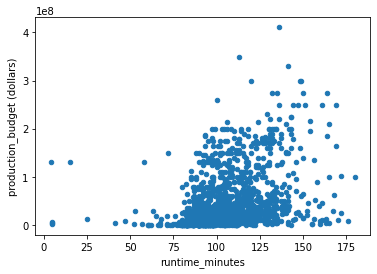

In [96]:
# Creating a scatterplot of "runtime_minutes" vs. "production_budget"

df_imdb_numbers.plot.scatter(x="runtime_minutes", y="production_budget (dollars)")

The correlation coefficient is 0.35, which is a weak correlation between runtime and production budget.

The data points are clustered in the bottom right of the visualization.  

Based on the correlation coefficient and visualization, I determine there is a lack of a linear relationship between runtime and production budget.  As a result, I will not progress with creating a simple linear regression with the aforementioned variables.

## Runtime vs. Net Profit

I am going to calculate the correlation coefficient between runtime (independent variable) vs. net profit (dependent variable).  I am also going create a scatterplot of runtime (independent variable) vs. net profit (dependent variable).  The correlation coefficient and visualization is below.

In [97]:
# Calculating correlation for "runtime_minutes" vs. "net profit"

correlation, p_value = pearsonr(df_imdb_numbers["runtime_minutes"], df_imdb_numbers["net_profit (dollars)"])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.27071126788955796


<AxesSubplot:xlabel='runtime_minutes', ylabel='net_profit (dollars)'>

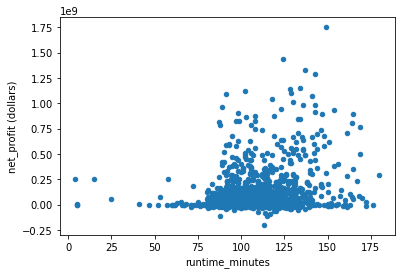

In [98]:
df_imdb_numbers.plot.scatter(x="runtime_minutes", y="net_profit (dollars)")

The correlation coefficient is 0.27, which is a weak correlation between runtime and net profit.

The data points are clustered in the bottom right of the visualization. 

Based on the correlation coefficient and visualization, I determine there is a lack of a linear relationship between runtime and net profit. As a result, I will not progress with creating a simple linear regression with the aforementioned variables.

## Production Budget vs. Net Profit

I am going to calculate the correlation coefficient between production budget (independent variable) vs. net profit (dependent variable).  I am also going create a scatterplot of production budget (independent variable) vs. net profit (dependent variable).  The correlation coefficient and visualization is below.

In [99]:
# Calculating correlation for "production budget" vs. "net profit"

correlation, p_value = pearsonr(df_imdb_numbers["production_budget (dollars)"], df_imdb_numbers["net_profit (dollars)"])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.666083136779432


<AxesSubplot:xlabel='production_budget (dollars)', ylabel='net_profit (dollars)'>

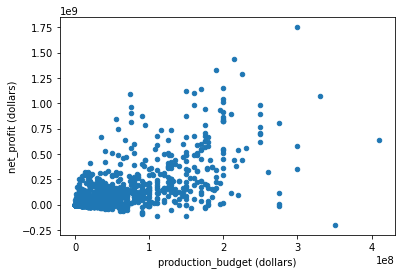

In [100]:
# Creating a scatter plot of 'production_budget (dollars)' vs. 'net_profit (dollars)'

df_imdb_numbers.plot.scatter(x="production_budget (dollars)", y="net_profit (dollars)")

The correlation coefficient is 0.66, which is a strong correlation between production budget and net profit.

The majority of data points are clustered in the bottom left quadrant of the visualization.  Based on the visualization, it appears that not all movies become a *blockbuster* hit based on the production budget.  

In spite of the clustering, there still appears to be a linear relationship between production budget and net profit based on the correlation coefficient and visualization.  As a result, I will proceed with creating a simple linear regression model with the aforementioned variables.

### Production Budget vs. Net Profit | Simple Linear Regression Model

In [101]:
import statsmodels.api as sm

# Creating a simple linear regression of 'production_budget (dollars)' vs. 'net_profit (dollars)'

# Determining X and y values

X = df_imdb_numbers['production_budget (dollars)']
y = df_imdb_numbers['net_profit (dollars)']


# Creating an OLS model

model_budget_profit = sm.OLS(endog=y, exog=sm.add_constant(X))


# Get model results

results_budget_profit = model_budget_profit.fit()


# Examining p-values

results_budget_profit.pvalues
print(results_budget_profit.pvalues)


# Display results summary

results_budget_profit.summary()

const                           2.601754e-01
production_budget (dollars)    1.172606e-195
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     net_profit (dollars)   R-squared:                       0.444
Model:                              OLS   Adj. R-squared:                  0.443
Method:                   Least Squares   F-statistic:                     1211.
Date:                  Wed, 06 Nov 2024   Prob (F-statistic):          1.17e-195
Time:                          22:49:01   Log-Likelihood:                -30728.
No. Observations:                  1521   AIC:                         6.146e+04
Df Residuals:                      1519   BIC:                         6.147e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -5.3e+06   4.71e+06     -1.126      0.260   -1.45e+07    3.93e+06
production_budget (dollars)     2.2875      0.066     34.805      0.000       2.159       2.416
==============================================================================
Omnibus:                      716.299   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11206.616
Skew:                           1.792   Prob(JB):                         0.00
Kurtosis:                      15.806   Cond. No.                     9.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Production Budget vs. Net Profit | Simple Linear Regression Model Assumptions

- Indepdendence of Errors 
- Normal Distribution (of Residuals)
- Homoscedasticity

**Independence of Errors**

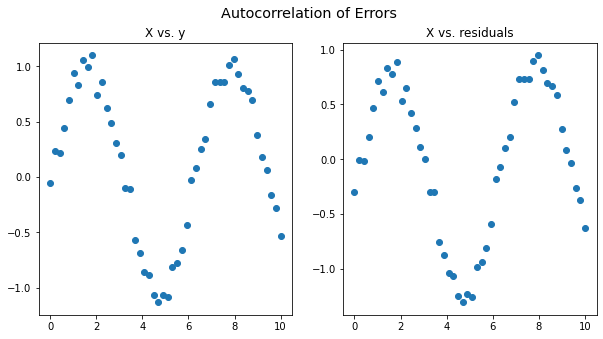

In [102]:
#y = np.sin(X) + np.random.normal(scale=0.1, size=50).reshape(-1, 1)

X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape[0]).reshape(-1, 1)

model_budget_profit = sm.OLS(y, sm.add_constant(X))
results_budget_profit = model_budget_profit.fit()

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].scatter(X, y)
axes[0].set_title("X vs. y")
axes[1].scatter(X, y.reshape(1, -1) - results_budget_profit.predict(sm.add_constant(X)))
axes[1].set_title("X vs. residuals")
fig.suptitle("Autocorrelation of Errors", fontsize="x-large");


The curved feature of the two plots displays that there is autocorrelation, which violates the following assumption - independence of errors - of simple linear regression model. 

**Normal Distribution (of Residuals)**

Text(0.5, 0, 'Model Residuals')

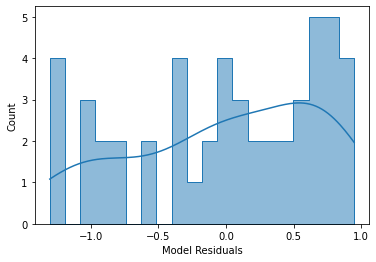

In [103]:
# Creating a histogram of the residuals

fig, ax = plt.subplots()
sns.histplot(results_budget_profit.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")

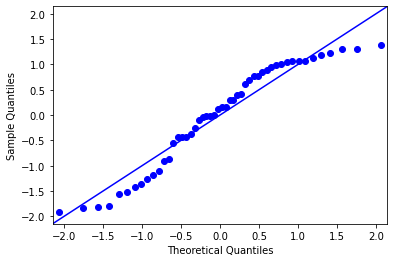

In [104]:
# Creating a Q-Q plot(quantile-quantile) to examine whether or not the residuals follow a normal distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results_budget_profit.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customizing plot appearance
line = ax.lines[1]
line.set_color("blue")

I created a histogram of the residuals.  A normal distribution is associated with a bell-shaped curve, which is not evident in the histogram plot.

I also created a Q-Q plot to evidence whether or not there is a normal distribution of the residuals, which is one of the assumptions of a simple linear regression.  The residuals constantly diverge from the diagonal line in the Q-Q plot.  

The aforementioned constant divergence and the lack of a bell-shaped curve in the histogram plot evidences that the residuals do not have a normal distribution. 

**Homoscedasticity**

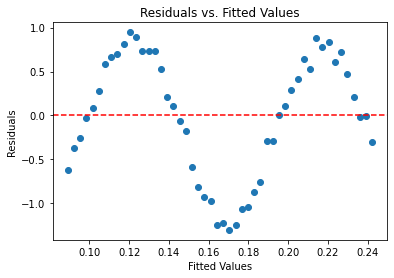

In [113]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

plt.scatter(model.predict(X), results_budget_profit.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

ValueError: x and y must be the same size

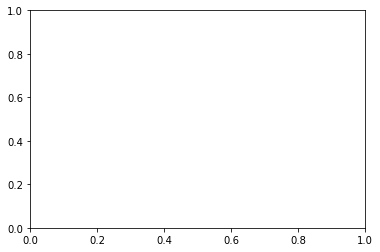

In [114]:
# Visualize residuals to examine homoscedasticity


#fig, ax = plt.subplots()

#ax.scatter(df["newspaper"], results_newspaper.resid)
#ax.axhline(y=0, color="black")
#ax.set_xlabel("newspaper")
#ax.set_ylabel("sales")

fig, ax = plt.subplots()

#ax.scatter(df_imdb_numbers["production_budget (dollars)"], results_budget_profit.resid)
ax.scatter(df_imdb_numbers['production_budget (dollars)'], results_budget_profit.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("production_budget (dollars)")
ax.set_ylabel("net_profit (dollars)")

In [106]:
print(len(df_imdb_numbers["production_budget (dollars)"]))

print(len(df_imdb_numbers["net_profit (dollars)"]))

df_imdb_numbers.isnull().sum() 

1521
1521


id                             0
release_date                   0
movie                          0
production_budget (dollars)    0
domestic_gross (dollars)       0
worldwide_gross (dollars)      0
net_profit (dollars)           0
release_year                   0
movie_id                       0
primary_title                  0
original_title                 0
start_year                     0
runtime_minutes                0
genres                         2
dtype: int64

# Overall Conclusion and Recommendations

# Next Steps